In [406]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.set()

In [476]:
#Importing Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [408]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [409]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [233]:
#y = train.iloc[:, 1]
#X = train
#X.drop(['Survived'], axis=1, inplace=True)

In [234]:
#X.head()

## Data Exploration

In [410]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [479]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [477]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are missing values on both training and test datset. We will address these later.

### Data Dictionary

- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [480]:
#Finding categorical and numerical features
categorical_features = train.select_dtypes(include=['object'])
numeric_features = train.select_dtypes(exclude=['object'])

In [481]:
print('There are {} categorical and {} numeric features in the training dataset'
      .format(categorical_features.shape[1], numeric_features.shape[1]))

There are 5 categorical and 7 numeric features in the training dataset


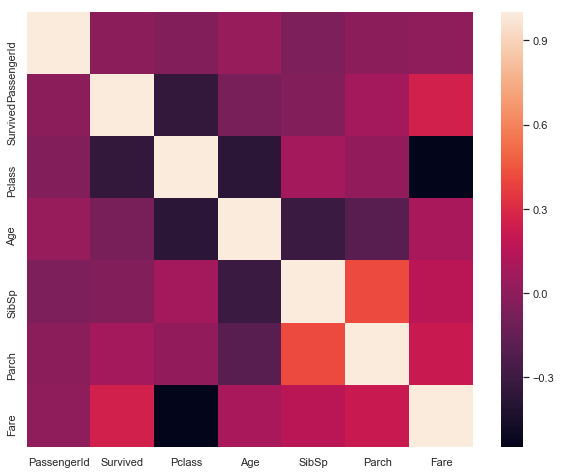

In [482]:
corr = numeric_features.corr()
sns.heatmap(corr)

In [416]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Above correlation data does not yield much information about their relation with dependent variable.

Now let's plot Passenger Class against their survival using a bar plot.

In [417]:
#Method to plot graph against 'Survived' feature
def bar_plot(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])
    df.plot(kind='bar', stacked=True)

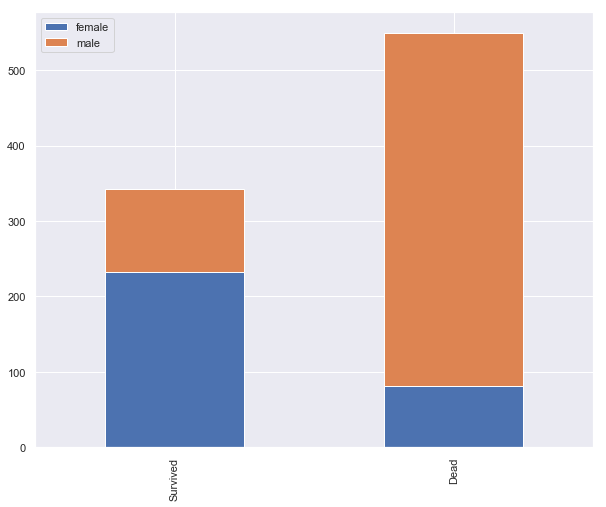

In [259]:
bar_plot('Sex')

Above plot clearly shows that men were more likely to be dead than female.

We will use above method bar_plot() for other features as well later.

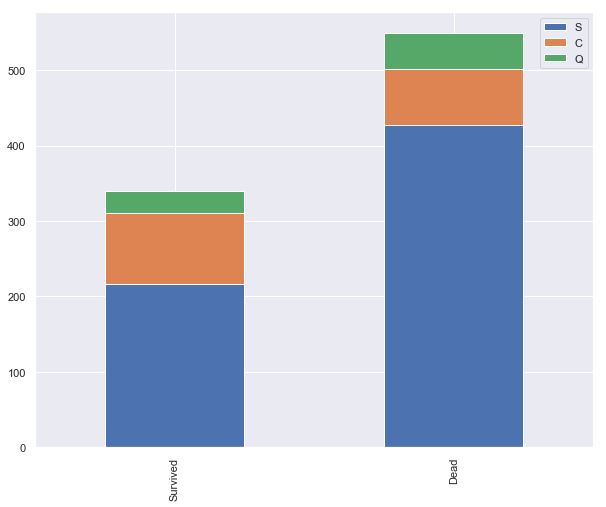

In [260]:
bar_plot('Embarked')

## Feature Engineering

### 1. Sex

In [483]:
#Encoding to Binary
train['Sex'] = pd.get_dummies(train['Sex'], drop_first=True)
test['Sex'] = pd.get_dummies(test['Sex'], drop_first=True)

In [484]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


### 2. Embarked

In [487]:
#Encoding to Binary
train['Embarked'] = pd.get_dummies(train['Embarked'], drop_first=True)
test['Embarked'] = pd.get_dummies(test['Embarked'], drop_first=True)

In [488]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0


### 3. Age

The age range is too large. We can decrease it by catgorizing the ages in 4 groups.
This is called Binning.

In [489]:
def enc_age(age):
    if age <= 16:
        return 0
    elif age > 16 and age <=26:
        return 1
    elif age > 26 and age <=36:
        return 2
    elif age > 36 and age <=66:
        return 4
    elif age > 66:
        return 5
    
train['enc_age'] = train['Age'].apply(enc_age)
test['enc_age'] = test['Age'].apply(enc_age)

In [490]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,enc_age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,4.0


### 4. Cabin

In [491]:
train['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
F2                 3
C22 C26            3
F33                3
E101               3
B5                 2
C68                2
B49                2
E24                2
C65                2
E67                2
E33                2
C78                2
B35                2
C52                2
F G73              2
E8                 2
B77                2
C125               2
B22                2
C83                2
D36                2
D35                2
E25                2
B18                2
E44                2
B57 B59 B63 B66    2
                  ..
C54                1
D19                1
E58                1
D48                1
B82 B84            1
B19                1
B50                1
E50                1
D47                1
F E69              1
C86                1
C7                 1
C70                1
A20                1
C62 C64            1
D11                1
C82          

In [492]:
#Finding unique first characters for Cabin
train['Cabin'].str[:1].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [495]:
#Extracting firty char from Cabin
#For training data
train['enc_cabin'] = train['Cabin'].str[:1]
dic = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
train['enc_cabin'] = train['enc_cabin'].map(dic)

#For test data
test['enc_cabin'] = test['Cabin'].str[:1]
test['enc_cabin'] = test['enc_cabin'].map(dic)

In [496]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,enc_age,enc_cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,4.0,3.0


In [497]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,enc_age,enc_cabin
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,2.0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,4.0,NaN


### Filling Missing Value

In [498]:
#Lets fill missing values in enc_cabin feature
#fill missing Cabin with median Cabin ID for each Pclass

train["enc_cabin"].fillna(train.groupby("Pclass")["enc_cabin"].transform("median"), inplace=True)
test["enc_cabin"].fillna(test.groupby("Pclass")["enc_cabin"].transform("median"), inplace=True)

In [499]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
enc_age        177
enc_cabin        0
dtype: int64

In [500]:
#Checking average age grouped by Sex
train.groupby("Sex")['enc_age'].mean()

Sex
0    1.831418
1    2.048565
Name: enc_age, dtype: float64

In [512]:
#Filling missing age with average age in that sex group
train['enc_age'] = train['enc_age'].fillna(train['enc_age'].mean())
test['enc_age'] = test['enc_age'].fillna(train['enc_age'].mean())

In [513]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
enc_age          0
enc_cabin        0
dtype: int64

In [514]:
# Filling 1 missing Fare value in test data
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [515]:
y = train['Survived']
X = train.drop(['Survived', 'Cabin', 'Ticket', 'Name', 'PassengerId', 'Age'], axis=1)

### Modeling

In [516]:
#Importinh modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [522]:
#Splitting training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Feature Scaling before PCA

In [523]:
from sklearn.preprocessing import StandardScaler

sscalar = StandardScaler()
X_train = sscalar.fit_transform(X_train)
X_test = sscalar.transform(X_test)

c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## PCA

In [537]:
from sklearn.decomposition import PCA

pca = PCA()
X_Train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [538]:
X_Train_pca

array([[-1.28120312, -0.54372755, -0.75786255, ...,  0.20336926,
         0.18770691, -0.12726821],
       [-0.04348282, -0.33276454, -0.69424596, ..., -0.56790893,
        -0.01819066,  0.4204589 ],
       [-1.092892  , -0.82343615, -0.65926794, ...,  0.12708291,
         0.32586556, -0.16945154],
       ...,
       [ 3.07148646,  2.49698999,  0.4869668 , ...,  1.12943489,
         0.09975034,  0.07316988],
       [-0.45302864,  0.95202251, -0.99374705, ...,  0.35674786,
        -0.82248991,  0.51334763],
       [-1.31127543, -0.55737894, -0.76108129, ...,  0.18951595,
         0.13961561, -0.13006543]])

In [539]:
#n_components = no. of features by default
pca.explained_variance_ratio_ 

array([0.31843708, 0.21241665, 0.12831893, 0.10526678, 0.09759342,
       0.06861509, 0.05320015, 0.0161519 ])

### 1.  Logistic Regression

In [392]:
log_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
log_classifier.fit(X_train, y_train)
log_predict = log_classifier.predict(X_test)

### 2. Random Forest Classifier

In [540]:
rf = RandomForestClassifier(n_estimators=12)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

### 3. SVM

In [394]:
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = rf.predict(X_test)

c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Checking accuracies of above models

In [396]:
from sklearn.model_selection import cross_val_score
scoring = 'accuracy'
score_lr = cross_val_score(log_classifier, X_test, y_test, cv=10, scoring=scoring)
score_rf = cross_val_score(rf, X_test, y_test, cv=10, scoring=scoring)
score_svm = cross_val_score(svm, X_test, y_test, cv=10, scoring=scoring)

print('Logistic Regression :', score_lr.mean())
print('Random Forest :', score_rf.mean())
print('Support Vector Machine :', score_svm.mean())

Logistic Regression : 0.7834249084249084
Random Forest : 0.7905677655677655
Support Vector Machine : 0.6564713064713065


c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warnin

## GridSearchCV using pipeline for Random Forest and PCA

In [544]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[('pca', pca), ('forest', rf)])

param_dict = {"pca__n_components":[2, 4, 6, 8],
              "forest__n_estimators":[10, 20, 30, 40, 50]}

estimator = GridSearchCV(pipe,
                         param_dict,
                         verbose=2)

estimator.fit(X_train, y_train)

c:\users\saurav\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] forest__n_estimators=10, pca__n_components=2 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=2, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=2 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=2, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=2 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=2, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=4 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=4, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=4 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=4, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=4 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=4, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=6 ....................
[CV] ..... fores

[CV] ..... forest__n_estimators=50, pca__n_components=8, total=   0.0s
[CV] forest__n_estimators=50, pca__n_components=8 ....................
[CV] ..... forest__n_estimators=50, pca__n_components=8, total=   0.0s
[CV] forest__n_estimators=50, pca__n_components=8 ....................
[CV] ..... forest__n_estimators=50, pca__n_components=8, total=   0.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
      ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pca__n_components': [2, 4, 6, 8], 'forest__n_estimators': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [545]:
print("The best parameters: {0}".format(estimator.best_params_))

The best parameters: {'forest__n_estimators': 40, 'pca__n_components': 8}


In [546]:
pipe.set_params(**estimator.best_params_)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
         ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [547]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
         ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [549]:
from sklearn.metrics import accuracy_score

test_predictions = pipe.predict(X_train)
precision = accuracy_score(test_predictions, y_train) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(precision))

Accuracy with RandomForest: 96.629213%


In [551]:
test_predictions = pipe.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(precision))

Accuracy with RandomForest: 78.358209%


# For Kaggle

In [553]:
test_data = test.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'Age'], axis=1).copy()
#Random Forest without PCA
#y_pred = rf.predict(test_data)

#Random Forest with PCA
y_pred = pipe.predict(test_data)

In [554]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })

In [555]:
submission.to_csv('submission.csv', index=False)

In [556]:
submitted = pd.read_csv('submission.csv')
submitted.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,0
9,901,1


#### The accuracy was approximatele 0.74 when submitted on Kaggle.